## Softmax Regression Model from Scratch

In [7]:
from keras.datasets import mnist 
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model import LogisticRegression 
import matplotlib.pyplot as plt 
import numpy as np 

In [3]:
class SoftmaxRegression:
    def __init__(self):
        self.weights = None 
        self.class_names = None 
        pass 

    def softmax(self, z):
        exp_i = np.exp(z)
        return exp_i / np.sum(exp_i, axis = 0)

    def one_hot_encoding(self, y):
        self.class_names = list(set(y))
        n = len(self.class_names)
        class_dict = dict(zip(self.class_names, range(n)))
        y = list(map(lambda x: class_dict[x], y))
        m = len(y)
        y_one_hot = np.zeros((m, n))
        y_one_hot[range(m), y] = 1
        return y_one_hot

    def fit(self, X, y, weights, alpha, batch_size=64, n_iter=100, stop_thresh=1e-9):
        '''
        Perform gradient descent algorithm for optimization
        '''
        from timeit import default_timer
        from math import ceil
        m = len(X)
        n_batch = ceil(m / batch_size)
        log_likelihood_history = np.zeros(n_iter)
        y = self.one_hot_encoding(y)
        start = default_timer()
        for i in range(n_iter):
            print('Epoch %d/%d' % (i + 1, n_iter))
            shuffled_index = np.random.permutation(m)
            X, y = X[shuffled_index], y[shuffled_index]
            for j in range(n_batch):
                X_batch = X[j * batch_size:min((j + 1) * batch_size, m)]
                y_batch = y[j * batch_size:min((j + 1) * batch_size, m)]
                h = self.softmax(weights @ X_batch.T).T 
                gradients = (h - y_batch).T @ X_batch
                weights = weights - alpha * gradients
            
            log_likelihood_history[i] = -np.sum(y * np.log(self.softmax(weights @ X.T).T))
            print('Loss: %f' % log_likelihood_history[i])

        end = default_timer()
        print('Training time: %f' % (end - start))
        self.weights = weights
        return log_likelihood_history

    def predict_prob(self, x):
        return self.softmax(self.weights @ x.T)

    def predict(self, x):
        return np.argmax(self.predict_prob(x), axis=0)
    
    def predict_class(self, x):
        return list(map(lambda i: self.class_names[i], self.predict(x)))

<Figure size 640x480 with 0 Axes>

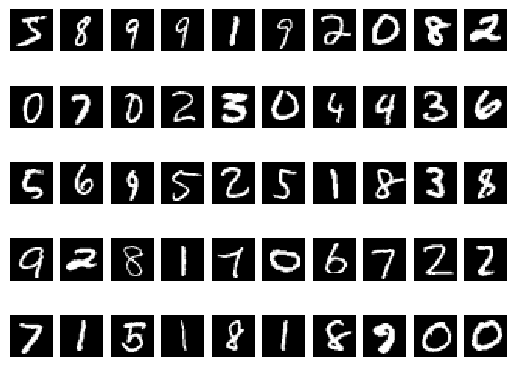

In [4]:


def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    from sklearn.metrics import confusion_matrix
    from sklearn.utils.multiclass import unique_labels
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Unnormalized confusion matrix'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Unnormalized confusion matrix')

    # print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax
     

# Load MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# show the example of image in the dataset
plt.gray()
fig, ax = plt.subplots(5, 10)
for i in range(5):
  for j in range(10):
    ax[i, j].matshow(X_train[1000 * i + 300 * j])
    ax[i, j].axis('off')
     


In [5]:
# Flatten all the images
flatten_dim = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape(X_train.shape[0], flatten_dim)
X_test = X_test.reshape(X_test.shape[0], flatten_dim)
     

# preprocess data by standardization (zero mean, unit variance)
scaler = StandardScaler()
X_train_ = scaler.fit_transform(X_train)
X_test_ = scaler.transform(X_test)

X_train_ = np.append(np.ones((X_train.shape[0], 1)), X_train_, axis=1)
X_test_ = np.append(np.ones((X_test.shape[0], 1)), X_test_, axis=1)

Epoch 1/500
Loss: 18133.430551
Epoch 2/500
Loss: 16739.324717
Epoch 3/500
Loss: 16210.046988
Epoch 4/500
Loss: 15806.500849
Epoch 5/500
Loss: 15468.818112
Epoch 6/500
Loss: 15260.772952
Epoch 7/500
Loss: 15150.728369
Epoch 8/500
Loss: 14957.467566
Epoch 9/500
Loss: 14884.330117
Epoch 10/500
Loss: 14713.186764
Epoch 11/500
Loss: 14652.211885
Epoch 12/500
Loss: 14475.461028
Epoch 13/500
Loss: 14407.192062
Epoch 14/500
Loss: 14311.512904
Epoch 15/500
Loss: 14263.716370
Epoch 16/500
Loss: 14243.090455
Epoch 17/500
Loss: 14092.817554
Epoch 18/500
Loss: 14115.934483
Epoch 19/500
Loss: 14046.366508
Epoch 20/500
Loss: 14024.365653
Epoch 21/500
Loss: 14013.162222
Epoch 22/500
Loss: 13908.289047
Epoch 23/500
Loss: 13851.194469
Epoch 24/500
Loss: 13818.334561
Epoch 25/500
Loss: 13861.282135
Epoch 26/500
Loss: 13701.084828
Epoch 27/500
Loss: 13709.494427
Epoch 28/500
Loss: 13727.766734
Epoch 29/500
Loss: 13646.826717
Epoch 30/500
Loss: 13630.460001
Epoch 31/500
Loss: 13641.462398
Epoch 32/500
Loss

<Axes: title={'center': 'Normalized confusion matrix'}, xlabel='Predicted label', ylabel='True label'>

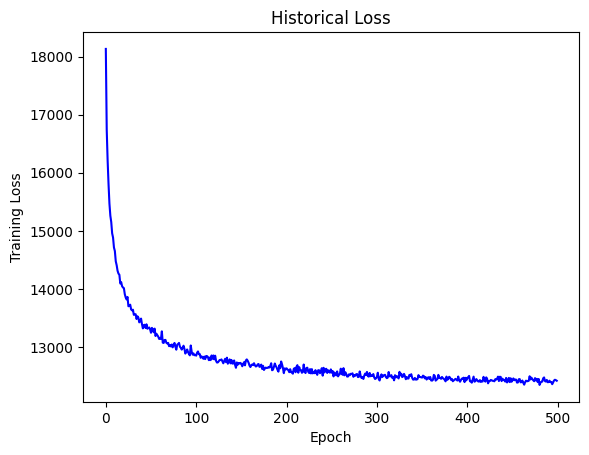

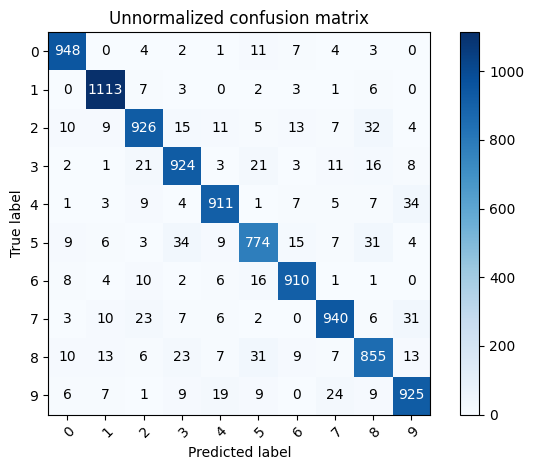

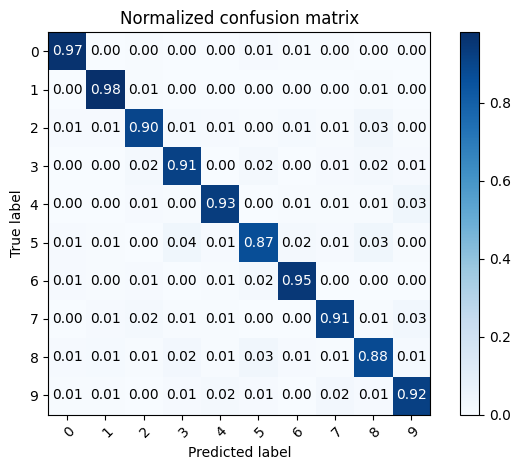

In [6]:
# Softmax Regression from Scratch
smr = SoftmaxRegression()
history = smr.fit(X_train_, y_train, np.zeros((len(set(y_train)), X_train_.shape[1])), 0.0005, 64, 500)
fig, ax = plt.subplots()
ax.plot(range(len(history)), history, 'b')
ax.set_title('Historical Loss')
ax.set_xlabel('Epoch')
ax.set_ylabel('Training Loss')
predict = smr.predict(X_test_)
plot_confusion_matrix(y_test, predict, np.array(smr.class_names), normalize=False)
plot_confusion_matrix(y_test, predict, np.array(smr.class_names), normalize=True)
     

In [ ]:
# preprocess data by standardization (zero mean, unit variance)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Softmax Regression from Sklearn library
lr = LogisticRegression()
lr.fit(X_train, y_train)
predict = lr.predict(X_test)
plot_confusion_matrix(y_test, predict, np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), normalize=False)
plot_confusion_matrix(y_test, predict, np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), normalize=True)